In [104]:
%load_ext autoreload
%autoreload 2
%pylab inline
from glob import glob
from os.path import join
from imagery_psychophysics.src.inference_machinery import *
from imagery_psychophysics.src.counting_machinery import *
from scipy.optimize import curve_fit
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


### All color counts for up to 6 colors, 5 windows

In [2]:
 foo = enumerate_nbd_color_counts(2, window(range(4)), redundant=False)

counts so far: 0
took 0.000285 seconds
took 0.006682 seconds
---
should be: 81. Is: 81
reduced to: 41
reduction is: 49.382716 percent


In [3]:
color_range = range(1,7)
window_range = range(1,6)

save_to_path = '/media/tnaselar/Data/color_count_matrices/'

In [4]:
for n_colors in color_range:
    for n_windows in window_range:
        theory = (2**n_colors-1)**n_windows
        print '===========colors: %0.3d, windows: %0.3d' %(n_colors, n_windows)
        color_count_df = enumerate_nbd_color_counts(n_colors,window(range(n_windows)), redundant=False)
        color_count_df.to_pickle(join(save_to_path,'colors_%0.3d_windows_%0.3d.pd' %(n_colors,n_windows)))

===========colors: 001, windows: 001
counts so far: 0
took 0.000083 seconds
took 0.000484 seconds
---
should be: 1. Is: 1
reduced to: 1
reduction is: 0.000000 percent
===========colors: 001, windows: 002
counts so far: 0
took 0.000070 seconds
took 0.000618 seconds
---
should be: 1. Is: 1
reduced to: 1
reduction is: 0.000000 percent
===========colors: 001, windows: 003
counts so far: 0
took 0.000070 seconds
took 0.001319 seconds
---
should be: 1. Is: 1
reduced to: 1
reduction is: 0.000000 percent
===========colors: 001, windows: 004
counts so far: 0
took 0.000093 seconds
took 0.002765 seconds
---
should be: 1. Is: 1
reduced to: 1
reduction is: 0.000000 percent
===========colors: 001, windows: 005
counts so far: 0
took 0.000256 seconds
took 0.003098 seconds
---
should be: 1. Is: 1
reduced to: 1
reduction is: 0.000000 percent
===========colors: 002, windows: 001
counts so far: 0
took 0.000046 seconds
took 0.002071 seconds
---
should be: 3. Is: 3
reduced to: 2
reduction is: 33.333333 perce

#### What is difference between number of colorings and number of color counts?

In [64]:
n_colors = []
n_color_counts = []
n_wins = 5
for ccm in glob(join(save_to_path,'*windows_%0.3d.pd' %(n_wins))):
    dx = ccm.index('colors')+9
    n_colors.append(int(ccm[dx]))
    print n_colors
    n_color_counts.append(pd.load(ccm).shape[0])

n_colorings = map(lambda x: (2**x-1)**n_wins,n_colors)

idx = np.argsort(n_colors)
n_colors = np.array(n_colors)[idx]
n_colorings = np.array(n_colorings)[idx]
n_color_counts = np.array(n_color_counts)[idx]

[5]
[5, 6]
[5, 6, 3]
[5, 6, 3, 4]
[5, 6, 3, 4, 2]
[5, 6, 3, 4, 2, 1]


In [65]:
print n_colorings
print n_color_counts

[        1       243     16807    759375  28629151 992436543]
[      1     122    2923   35954  306861 2069818]


In [69]:
reduction = map(lambda x,y: x/float(y),n_color_counts,n_colorings)

In [73]:
reduction

[1.0,
 0.50205761316872433,
 0.17391563039209854,
 0.047346831275720168,
 0.010718480614391953,
 0.0020855922875866934]

In [123]:
def func(x, a, b):
#     return a * np.exp(-b * x) + c
      return np.log10(a)+b*x

x = n_colors
y = np.log10(reduction)
popt, pcov = curve_fit(func, x, y)

In [124]:
ext = np.array(list(n_colors)+[7,8,9,10])
print ext.shape
print func(ext,*popt)

(10,)
[ 0.18339298 -0.3589145  -0.90122198 -1.44352945 -1.98583693 -2.5281444
 -3.07045188 -3.61275935 -4.15506683 -4.6973743 ]


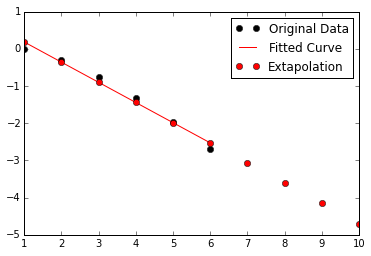

In [125]:
plt.figure()
plt.plot(x, y, 'ko', label="Original Data")
plt.plot(x, func(x, *popt), 'r-', label="Fitted Curve")

plt.plot(ext, func(ext,*popt), 'ro', label = 'Extrapolation')
plt.legend()
plt.show()

In [129]:
print (2**10-1)**n_wins
print (2**10-1)**n_wins*(10**func(ext[-1],*popt))
print np.log10((2**10-1)**n_wins*(10**func(ext[-1],*popt)))

1120413075641343
22490746283.5
10.3520038663


#### ^^The shitty approximation in red says there are at least O(5) fewer color counts than colorings when n_colors = 10. Probably it will be even fewer, but this would be 10's of billions...seems doable. 

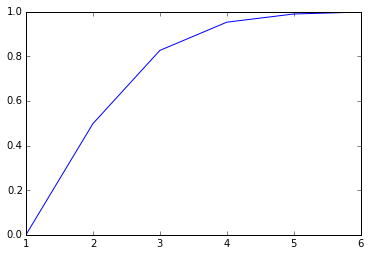

In [103]:
plt.plot(n_colors, 1-np.array(reduction))